In [40]:
import pandas as pd
import numpy as np
import glob #lets us 
import matplotlib.pyplot as plt
import seaborn as sns
import os

### SAGB NBA Project: Playoff Data Analysis:

In [41]:
# Process CSV files for the regular season:

files = [
    ('2015_reg.csv', '2015'),
    ('2016_reg.csv', '2016'),
    ('2017_reg.csv', '2017'),
    ('2018_reg.csv', '2018'),
    ('2019_reg.csv', '2019'),
    ('2020_reg.csv', '2020'),
    ('2021_reg.csv', '2021'),
    ('2022_reg.csv', '2022'),
    ('2023_reg.csv', '2023'),
    ('2024_reg.csv', '2024')
]

# Initialize an empty list to store the dataframes
df_list = []

# Loop through the files and read each CSV
for file, year in files:
    # Read the CSV file
    df = pd.read_csv(file, header=0)
    
    # Add the "Year" column
    df['Year'] = year
    
    # Append the dataframe to the list
    df_list.append(df)

# Combine all dataframes into one
combined_df = pd.concat(df_list, ignore_index=True)
df_reg = combined_df

new_columns = df.iloc[0].tolist()

# Set the new columns, but retain "Year" as the last column header
df_reg.columns = new_columns
df_reg['Year'] = df_list[-1]['Year']  # If Year is the last column added

# Drop the first row, as it was incorrectly read as data
df_reg = df_reg.drop(0)

# Reset index to maintain proper indexing
df_reg.reset_index(drop=True, inplace=True)

# Display the first few rows to verify
df_reg.drop('Year', axis = 1, inplace = True)
df_reg = df_reg.rename(columns={'2024': 'Year'})
df_reg.head(60)


,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,NaN,eFG%,TOV%,DRB%,FT/FGA,NaN,Arena,Attend.,Attend./G,Year
0,1,Golden State Warriors*,26.6,67,15,65,17,10.10,-0.09,10.01,...,NaN,.470,14.3,74.5,.217,NaN,Oracle Arena,803436,19596,2015
1,2,Los Angeles Clippers*,28.8,56,26,58,24,6.59,0.22,6.80,...,NaN,.493,13.2,75.7,.231,NaN,STAPLES Center,785892,19168,2015
2,3,San Antonio Spurs*,29.8,55,27,58,24,6.20,0.14,6.34,...,NaN,.484,13.3,77.3,.190,NaN,AT&T Center,762855,18606,2015
3,4,Atlanta Hawks*,27.8,60,22,56,26,5.43,-0.68,4.75,...,NaN,.492,14.9,73.4,.185,NaN,Philips Arena,713909,17412,2015
4,5,Cleveland Cavaliers*,26.9,53,29,53,29,4.48,-0.40,4.08,...,NaN,.502,12.6,74.7,.177,NaN,Quicken Loans Arena,843042,20562,2015
5,6,Portland Trail Blazers*,27.0,51,31,53,29,4.23,0.18,4.41,...,NaN,.476,11.3,76.2,.182,NaN,Moda Center,798368,19472,2015
6,7,Houston Rockets*,27.6,56,26,50,32,3.44,0.38,3.82,...,NaN,.486,14.6,72.9,.208,NaN,Toyota Center,747412,18230,2015
7,8,Memphis Grizzlies*,29.6,55,27,50,32,3.24,0.38,3.62,...,NaN,.492,14.5,75.3,.183,NaN,FedEx Forum,710502,17329,2015
8,9,Toronto Raptors*,26.1,49,33,49,33,3.07,-0.62,2.45,...,NaN,.506,13.4,73.3,.208,NaN,Air Canada Centre,809824,19752,2015
9,10,Chicago Bulls*,28.8,50,32,50,32,3.00,-0.46,2.54,...,NaN,.473,11.3,74.4,.182,NaN,United Center,886612,21625,2015


In [42]:
# Process playoff data
files = [
    ('2015_playoffs.csv', '2015'),
    ('2016_playoffs.csv', '2016'),
    ('2017_playoffs.csv', '2017'),
    ('2018_playoffs.csv', '2018'),
    ('2019_playoffs.csv', '2019'),
    ('2020_playoffs.csv', '2020'),
    ('2021_playoffs.csv', '2021'),
    ('2022_playoffs.csv', '2022'),
    ('2023_playoffs.csv', '2023'),
    ('2024_playoffs.csv', '2024')
]

df_list = []

# Loop through the files and read each CSV
for file, year in files:
    # Read the CSV file
    df = pd.read_csv(file, header=0)
    
    # Add the "Year" column
    df['Year'] = year
    
    # Append the dataframe to the list
    df_list.append(df)

# Combine all dataframes into one
combined_df = pd.concat(df_list)
df_playoff = combined_df


# Display the first few rows to verify
df_playoff.head(60)

,Rk,Team,Age,W,L,W/L%,PW,PL,ORtg,DRtg,...,eFG%,TOV%,ORB%,FT/FGA,Unnamed: 20,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Year
0,1.0,Golden State Warriors,26.4,16.0,5.0,0.762,16.0,5.0,108.7,100.5,...,0.521,13.5,26.2,0.184,NaN,0.458,13.1,75.3,0.228,2015
1,2.0,Cleveland Cavaliers,26.6,14.0,6.0,0.700,13.0,7.0,107.4,103.1,...,0.479,12.0,28.1,0.240,NaN,0.467,11.1,77.5,0.209,2015
2,3.0,Washington Wizards,27.5,6.0,4.0,0.600,6.0,4.0,105.8,101.7,...,0.497,13.3,26.8,0.202,NaN,0.470,12.2,77.2,0.177,2015
3,4.0,Chicago Bulls,28.7,6.0,6.0,0.500,7.0,5.0,104.4,100.7,...,0.474,13.1,26.8,0.199,NaN,0.452,11.8,74.3,0.198,2015
4,5.0,Los Angeles Clippers,28.8,7.0,7.0,0.500,8.0,6.0,108.4,107.1,...,0.515,11.8,21.3,0.241,NaN,0.505,12.5,75.0,0.250,2015
5,6.0,San Antonio Spurs,30.3,3.0,4.0,0.429,4.0,3.0,107.8,107.3,...,0.505,11.2,24.8,0.203,NaN,0.509,11.5,78.6,0.224,2015
6,7.0,Atlanta Hawks,27.7,8.0,8.0,0.500,8.0,8.0,103.4,103.6,...,0.484,11.9,21.6,0.178,NaN,0.486,12.9,74.7,0.184,2015
7,8.0,Memphis Grizzlies,30.3,6.0,5.0,0.545,5.0,6.0,103.0,104.4,...,0.451,10.5,23.7,0.225,NaN,0.501,14.1,77.2,0.192,2015
8,9.0,Houston Rockets,28.8,9.0,8.0,0.529,7.0,10.0,106.6,109.0,...,0.505,13.5,23.8,0.288,NaN,0.514,12.5,74.4,0.210,2015
9,10.0,Dallas Mavericks,30.4,1.0,4.0,0.200,2.0,3.0,107.9,112.0,...,0.493,12.1,28.1,0.209,NaN,0.520,12.4,75.1,0.291,2015


In [43]:
# Add a win column to determine whether the team won a championship that season or not:

champions = {'2024': 'Boston Celtics*',
 '2023': 'Denver Nuggets*',
 '2022': 'Golden State Warriors*',
 '2021': 'Milwaukee Bucks*',
 '2020': 'Los Angeles Lakers*',
 '2019': 'Toronto Raptors*',
 '2018': 'Golden State Warriors*',
 '2017': 'Golden State Warriors*',
 '2016': "Cleveland Cavaliers*",
 '2015': 'Golden State Warriors*'}

champions_2 = {'2024': 'Boston Celtics',
 '2023': 'Denver Nuggets',
 '2022': 'Golden State Warriors',
 '2021': 'Milwaukee Bucks',
 '2020': 'Los Angeles Lakers',
 '2019': 'Toronto Raptors',
 '2018': 'Golden State Warriors',
 '2017': 'Golden State Warriors',
 '2016': "Cleveland Cavaliers",
 '2015': 'Golden State Warriors'}

df_reg['Won Championship'] = df_reg.apply(lambda row: 1 if champions.get(row['Year']) == row['Team'] else 0, axis = 1)
df_playoff['Won Championship'] = df_playoff.apply(lambda row: 1 if champions_2.get(row['Year']) == row['Team'] else 0, axis = 1)
df_reg.head()

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,eFG%,TOV%,DRB%,FT/FGA,NaN,Arena,Attend.,Attend./G,Year,Won Championship
0,1,Golden State Warriors*,26.6,67,15,65,17,10.10,-0.09,10.01,...,.470,14.3,74.5,.217,NaN,Oracle Arena,803436,19596,2015,1
1,2,Los Angeles Clippers*,28.8,56,26,58,24,6.59,0.22,6.80,...,.493,13.2,75.7,.231,NaN,STAPLES Center,785892,19168,2015,0
2,3,San Antonio Spurs*,29.8,55,27,58,24,6.20,0.14,6.34,...,.484,13.3,77.3,.190,NaN,AT&T Center,762855,18606,2015,0
3,4,Atlanta Hawks*,27.8,60,22,56,26,5.43,-0.68,4.75,...,.492,14.9,73.4,.185,NaN,Philips Arena,713909,17412,2015,0
4,5,Cleveland Cavaliers*,26.9,53,29,53,29,4.48,-0.40,4.08,...,.502,12.6,74.7,.177,NaN,Quicken Loans Arena,843042,20562,2015,0


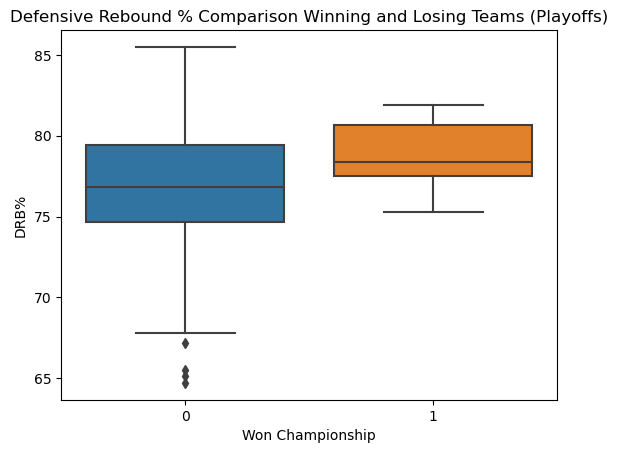

In [44]:
# Analysis of Defensive Rebounding Regular Season:

sns.boxplot(x='Won Championship', y='DRB%', data=df_playoff)
plt.title('Defensive Rebound % Comparison Winning and Losing Teams (Playoffs)')
plt.show()

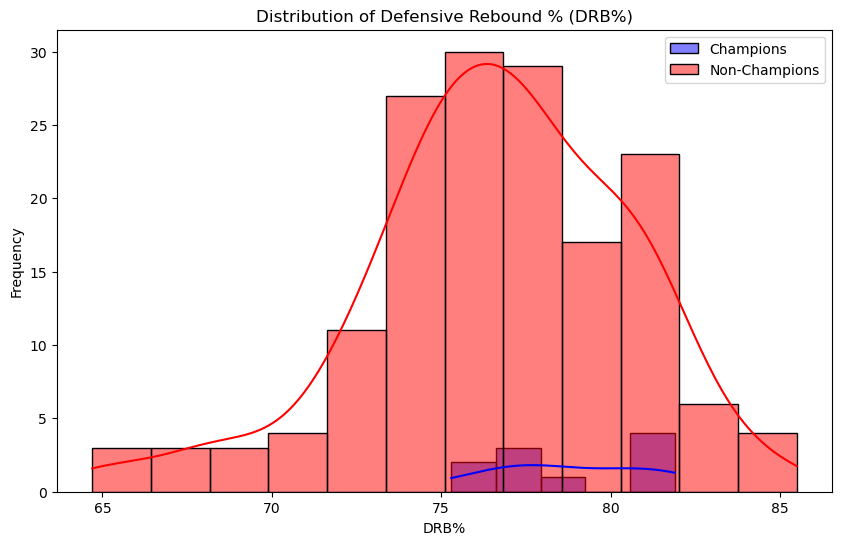

In [45]:
# Defensive Rebounding distribution during the Playoffs:
champions_df = df_playoff[df_playoff['Won Championship'] == 1]
non_champions = df_playoff[df_playoff['Won Championship'] == 0]


plt.figure(figsize=(10,6))
sns.histplot(champions_df['DRB%'], color='blue', label='Champions', kde=True)
sns.histplot(non_champions['DRB%'], color='red', label='Non-Champions', kde=True)
plt.title('Distribution of Defensive Rebound % (DRB%)')
plt.xlabel('DRB%')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# We can see that the Champions distribution falls towards the higher end of the other 29 teams in the NBA each season.

In [59]:
df_playoff.columns

Index(['index', 'Rk', 'Team', 'Age', 'W', 'L', 'W/L%', 'PW', 'PL', 'ORtg',
       'DRtg', 'NRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'Unnamed: 15', 'eFG%',
       'TOV%', 'ORB%', 'FT/FGA', 'Unnamed: 20', 'eFG%.1', 'TOV%.1', 'DRB%',
       'FT/FGA.1', 'Year', 'Won Championship'],
      dtype='object')

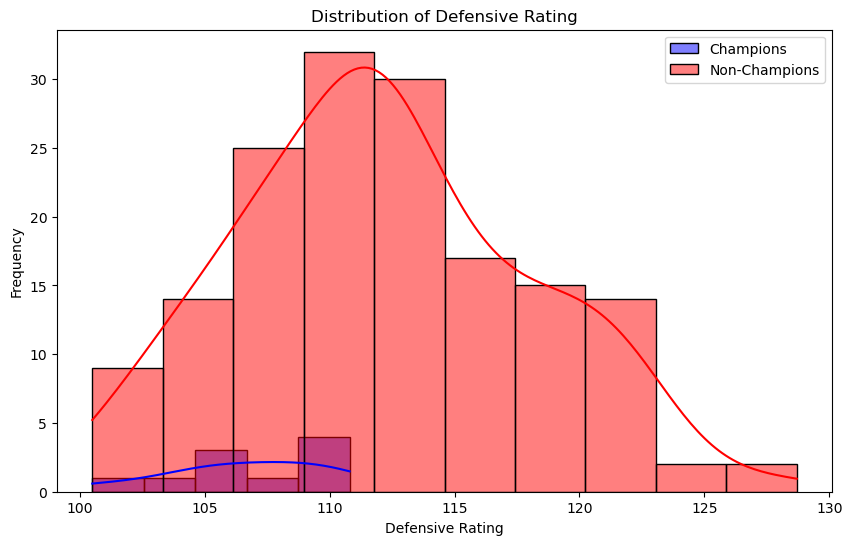

In [47]:
# Defensive Rating analysis:
plt.figure(figsize=(10,6))
sns.histplot(champions_df['DRtg'], color='blue', label='Champions', kde=True)
sns.histplot(non_champions['DRtg'], color='red', label='Non-Champions', kde=True)
plt.title('Distribution of Defensive Rating')
plt.xlabel('Defensive Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()

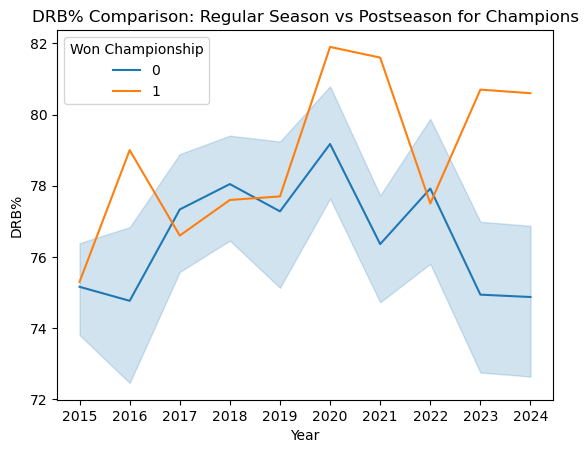

In [48]:
# Defensive Rebounding over time.
df_playoff.dropna(subset = ['Rk'], inplace = True)
df_playoff = df_playoff.reset_index()
sns.lineplot(data=df_playoff, x='Year', y='DRB%', hue='Won Championship')
plt.title('DRB% Comparison: Regular Season vs Postseason for Champions')
plt.show()


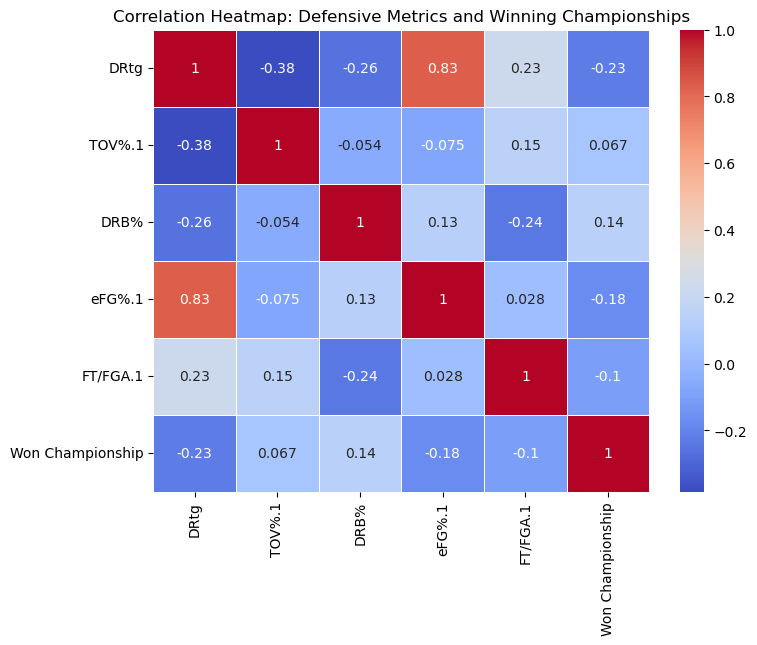

In [60]:
# Correlations between defensive statistics
defensive_metrics = df_playoff[['DRtg', 'TOV%.1', 'DRB%', 'eFG%.1', 'FT/FGA.1', 'Won Championship']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(defensive_metrics, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap: Defensive Metrics and Winning Championships')
plt.show()

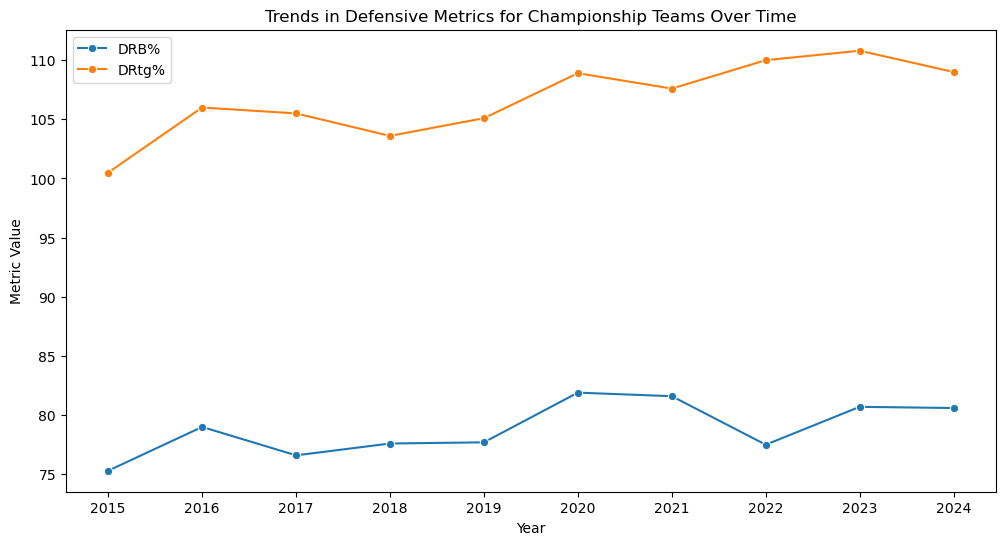

In [61]:
# Defensive Rating over time.
plt.figure(figsize=(12, 6))

winners = df_playoff[df_playoff['Won Championship'] == 1]
sns.lineplot(data=winners, x='Year', y='DRB%', marker='o', label='DRB%')
sns.lineplot(data=winners, x='Year', y='DRtg', marker='o', label='DRtg%')
plt.title('Trends in Defensive Metrics for Championship Teams Over Time')
plt.xlabel('Year')
plt.ylabel('Metric Value')
plt.legend()
plt.show()